## Harris角点检测+SIFT算法

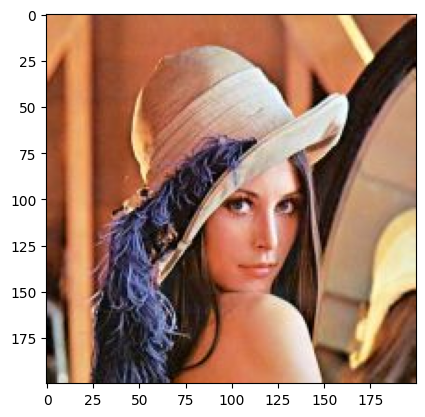

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import cv2

src = cv2.imread('Lenna.jpg')
plt.imshow(src[:,:,::-1])

In [5]:
def corner_harris(image,block_size,k_size,k):
    gray_img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    src = gray_img.astype(np.float32)
    # 计算x，y方向上的梯度
    dx = cv2.Sobel(src,cv2.CV_32F,1,0,ksize=k_size)
    dy = cv2.Sobel(src,cv2.CV_32F,0,1,ksize=k_size)
    # 计算Ix^2,Iy^2,IxIy
    IxIx = dx * dx
    IyIy = dy * dy
    IxIy = dx * dy
    # 利用高斯函数对IxIx,IyIy,IxIy进行滤波
    IxIx = cv2.GaussianBlur(IxIx,(block_size,block_size),0)
    IyIy = cv2.GaussianBlur(IyIy,(block_size,block_size),0)
    IxIy = cv2.GaussianBlur(IxIy,(block_size,block_size),0)
    # 计算R
    R = (IxIx * IyIy - IxIy * IxIy) - k * (IxIx + IyIy) * (IxIx + IyIy)
    # 阈值化
    R[R < 0] = 0
    return R


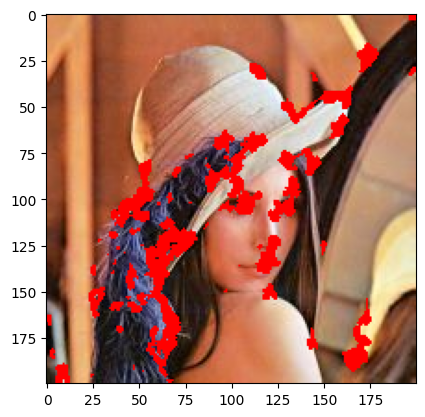

In [10]:
block_size = 5
k_size = 3
k = 0.04

R = corner_harris(src,block_size,k_size,k)
src[R>0.01*R.max()] = [0,0,255]
plt.imshow(src[:, :, ::-1], cmap='gray')
